In [329]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from pprint import pprint

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_df = pd.merge(mouse_df, trial_df, on="Mouse ID")
data_df["Mouse Count"] = 1

# Display the data table for preview
data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse Count
0,f234,Stelasyn,0,45.000000,0,1
1,f234,Stelasyn,5,47.313491,0,1
2,f234,Stelasyn,10,47.904324,0,1
3,f234,Stelasyn,15,48.735197,1,1
4,f234,Stelasyn,20,51.112713,2,1


## Tumor Response to Treatment

In [361]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
drug_tp_mean = pd.DataFrame(data_df.groupby(["Drug", "Timepoint"]).mean()[["Tumor Volume (mm3)", "Metastatic Sites"]])

# Preview DataFrame
drug_tp_mean.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111
          25                  54.287674          1.500000
          30                  56.769517          1.937500
          35                  58.827548          2.071429
          40                  61.467895          2.357143
          45                  64.132421          2.692308
Infubinol 0                   45.000000          0.000000
          5                   47.062001          0.280000
          10                  49.403909          0.666667
          15                  51.296397          0.904762
          20                  53.197691          1.050000
          25                  55.715252          1.277778
          30                  58.299397          1.588235
          35                  60.742461          1.666667
          40                  63.162824          2.100000
          45                  65.755562          2.111111
...                                 ...               ...
Ramicane  0                   45.000000          0.000000
          5                   43.944859          0.120000
          10                  42.531957          0.250000
          15                  41.495061          0.333333
          20                  40.238325          0.347826
          25                  38.974300          0.652174
          30                  38.703137          0.782609
          35                  37.451996          0.952381
          40                  36.574081          1.100000
          45                  34.955595          1.250000
Stelasyn  0                   45.000000          0.000000
          5                   47.527452          0.240000
          10                  49.463844          0.478261
          15                  51.529409          0.782609
          20                  54.067395          0.952381
          25                  56.166123          1.157895
          30                  59.826738          1.388889
          35                  62.440699          1.562500
          40                  65.356386          1.583333
          45                  68.438310          1.727273
Zoniferol 0                   45.000000          0.000000
          5                   46.851818          0.166667
          10                  48.689881          0.500000
          15                  50.779059          0.809524
          20                  53.170334          1.294118
          25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [331]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
drug_tp_stderr = pd.DataFrame(data_df.groupby(["Drug", "Timepoint"]).sem()[["Tumor Volume (mm3)", "Metastatic Sites"]])
drug_tp_stderr = drug_tp_stderr.rename(columns={"Tumor Volume (mm3)":"Tumor Volume (StdErr)",
                                               "Metastatic Sites":"Metastatic Sites (StdErr)"})

# Preview DataFrame
drug_tp_stderr.head()

Tumor Volume (StdErr)  Metastatic Sites (StdErr)
Drug      Timepoint                                                  
Capomulin 0                       0.000000                   0.000000
          5                       0.448593                   0.074833
          10                      0.702684                   0.125433
          15                      0.838617                   0.132048
          20                      0.909731                   0.161621

In [332]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
drug_tp_mice = pd.DataFrame(data_df.groupby(["Drug", "Timepoint"]).sum()["Mouse Count"])

# Preview DataFrame
drug_tp_mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [336]:
# Minor Data Munging to Re-Format the Data Frames
drug_data = pd.merge(drug_tp_stderr, drug_tp_mean, on=["Drug", "Timepoint"])
drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
drug_data = drug_data.loc[drug_list]
drug_data.head()
# Preview that Reformatting worked


Tumor Volume (StdErr)  Metastatic Sites (StdErr)  \
Drug      Timepoint                                                     
Capomulin 0                       0.000000                   0.000000   
          5                       0.448593                   0.074833   
          10                      0.702684                   0.125433   
          15                      0.838617                   0.132048   
          20                      0.909731                   0.161621   

                     Tumor Volume (mm3)  Metastatic Sites  
Drug      Timepoint                                        
Capomulin 0                   45.000000          0.000000  
          5                   44.266086          0.160000  
          10                  43.084291          0.320000  
          15                  42.064317          0.375000  
          20                  40.716325          0.652174

In [337]:
drug_data = pd.merge(drug_data, drug_tp_mice, on=["Drug", "Timepoint"])

drug_data.head()

Tumor Volume (StdErr)  Metastatic Sites (StdErr)  \
Drug      Timepoint                                                     
Capomulin 0                       0.000000                   0.000000   
          5                       0.448593                   0.074833   
          10                      0.702684                   0.125433   
          15                      0.838617                   0.132048   
          20                      0.909731                   0.161621   

                     Tumor Volume (mm3)  Metastatic Sites  Mouse Count  
Drug      Timepoint                                                     
Capomulin 0                   45.000000          0.000000           25  
          5                   44.266086          0.160000           25  
          10                  43.084291          0.320000           25  
          15                  42.064317          0.375000           24  
          20                  40.716325          0.652174           23

In [340]:
drug_data = drug_data[["Tumor Volume (mm3)", "Tumor Volume (StdErr)",
                       "Metastatic Sites", "Metastatic Sites (StdErr)", "Mouse Count"]]
drug_data.head()

Tumor Volume (mm3)  Tumor Volume (StdErr)  \
Drug      Timepoint                                              
Capomulin 0                   45.000000               0.000000   
          5                   44.266086               0.448593   
          10                  43.084291               0.702684   
          15                  42.064317               0.838617   
          20                  40.716325               0.909731   

                     Metastatic Sites  Metastatic Sites (StdErr)  Mouse Count  
Drug      Timepoint                                                            
Capomulin 0                  0.000000                   0.000000           25  
          5                  0.160000                   0.074833           25  
          10                 0.320000                   0.125433           25  
          15                 0.375000                   0.132048           24  
          20                 0.652174                   0.161621           23

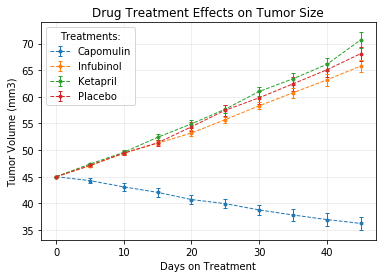

In [350]:
for i in range(0, len(drug_list)):
    plt.errorbar(x = np.arange(0, 50, 5),
                 y = drug_data.loc[drug_list[i]]["Tumor Volume (mm3)"],
                 yerr = drug_data.loc[drug_list[i]]["Tumor Volume (StdErr)"],
                 label = drug_list[i],
                 marker = ".",
                 linewidth = 1,
                 linestyle = "--",
                 capsize = 2)

plt.legend(title = "Treatments:", loc = 2)
plt.xlabel("Days on Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Drug Treatment Effects on Tumor Size", size = 12)
plt.grid(alpha = .25)
plt.show()

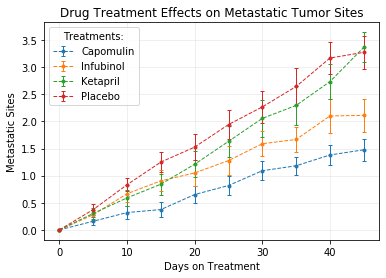

In [351]:
for i in range(0, len(drug_list)):
    plt.errorbar(x = np.arange(0, 50, 5),
                 y = drug_data.loc[drug_list[i]]["Metastatic Sites"],
                 yerr = drug_data.loc[drug_list[i]]["Metastatic Sites (StdErr)"],
                 label = drug_list[i],
                 marker = ".",
                 linewidth = 1,
                 linestyle = "--",
                 capsize = 2)

plt.title("Drug Treatment Effects on Metastatic Tumor Sites", size = 12)
plt.xlabel("Days on Treatment")
plt.ylabel("Metastatic Sites")
plt.legend(title = "Treatments:", loc = 2)
plt.grid(alpha = .25)

plt.show()

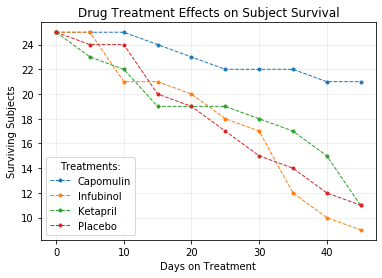

In [353]:
for i in range(0, len(drug_list)):
    plt.plot(drug_data.loc[drug_list[i]]["Mouse Count"],
             label = drug_list[i],
             marker = ".",
             linewidth = 1,
             linestyle = "--",)

plt.title("Drug Treatment Effects on Subject Survival", size = 12)
plt.xlabel("Days on Treatment")
plt.ylabel("Surviving Subjects")
plt.legend(title="Treatments:", loc = 3)
plt.grid(alpha = .25)

plt.show()

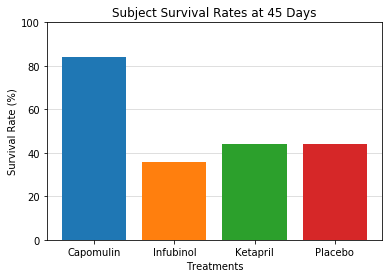

In [354]:
max_days = data_df["Timepoint"].max()

for i in range(0, len(drug_list)):
    plt.bar(height = (int(drug_data.loc[(drug_list[i], [max_days]), "Mouse Count"])/
                    int(drug_data.loc[(drug_list[i], [0]), "Mouse Count"])*100),
            x = i,
            zorder = 2)
    
plt.title(f"Subject Survival Rates at {max_days} Days", size = 12)
plt.xlabel("Treatments")
plt.xticks(np.arange(0, 4), drug_list)
plt.ylabel("Survival Rate (%)")
plt.yticks(np.arange(0, 101, 20))
plt.grid(alpha = .5, axis = "y", zorder = 1)

plt.show()

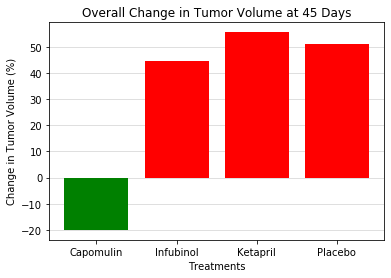

In [364]:
for i in range(0, len(drug_list)):
    growth = ((int(drug_data.loc[(drug_list[i], [max_days]), "Tumor Volume (mm3)"])/
                    int(drug_data.loc[(drug_list[i], [0]), "Tumor Volume (mm3)"])*100)-100)
    if growth <= 0:
        plt.bar(height = growth, x = i, zorder = 2, color = "green")
    else:
        plt.bar(height = growth, x = i, zorder = 2, color = "red")

plt.title(f"Overall Change in Tumor Volume at {max_days} Days", size = 12)
plt.xlabel("Treatments")
plt.xticks(np.arange(0, 4), drug_list)
plt.ylabel("Change in Tumor Volume (%)")
plt.grid(alpha=.5, axis="y", zorder = 1)

plt.show()